In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1) 데이터 로드 및 확인

In [2]:
data = pd.read_csv('Data/02_Boston/boston_data.csv')

In [3]:
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


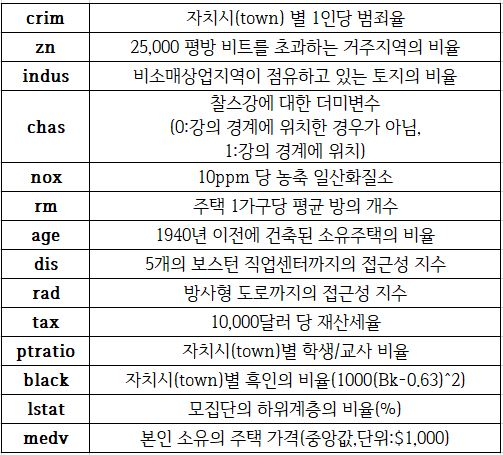

In [4]:
from IPython.display import Image

Image("Data/02_Boston/#Boston_Description.jpg")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


#### 2) 데이터 시각화

특별히 어떤 변수와 시각화를 해야 좋을 지 감이 잡히지 않아서,
칼럼들의 분산을 기준으로 시각화를 해야 할 변수 선정.

분산이 높으면 설명력이 높고, 그에 따라 관련이 가장 높은 변수라고 판단

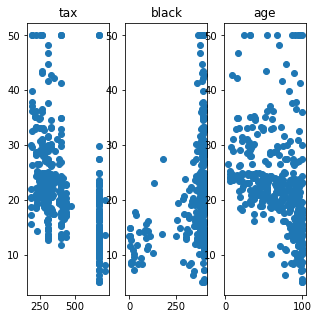

In [7]:
# 분산 최고 Top 3 tax,black,age 와 target(medv) 시각화
fig = plt.figure(figsize=[5,5])

ax1 = fig.add_subplot(1,3,1)
plt.scatter(data['tax'],data['medv'])
ax1.title.set_text('tax')

ax2 = fig.add_subplot(1,3,2)
plt.scatter(data['black'],data['medv'])
ax2.title.set_text('black')

ax3 = fig.add_subplot(1,3,3)
plt.scatter(data['age'],data['medv'])
ax3.title.set_text('age')

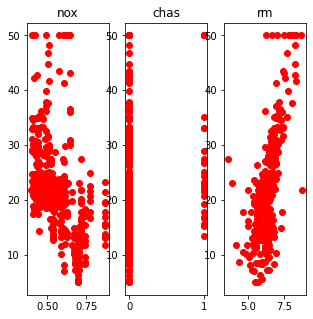

In [8]:
# 분산 최저 Top 3 nox,chas,rm 와 target 시각화
fig = plt.figure(figsize=[5,5])

ax1 = fig.add_subplot(1,3,1)
plt.scatter(data['nox'],data['medv'],color='r')
ax1.title.set_text('nox')

ax2 = fig.add_subplot(1,3,2)
plt.scatter(data['chas'],data['medv'],color='r')
ax2.title.set_text('chas')

ax3 = fig.add_subplot(1,3,3)
plt.scatter(data['rm'],data['medv'],color='r')
ax3.title.set_text('rm')

분산이 높은 변수와 낮은 변수 모두 시각화를 진행했지만 , 특별한 의미를 찾지 못 함.
모든 변수의 분포를 확인해보기로 결정

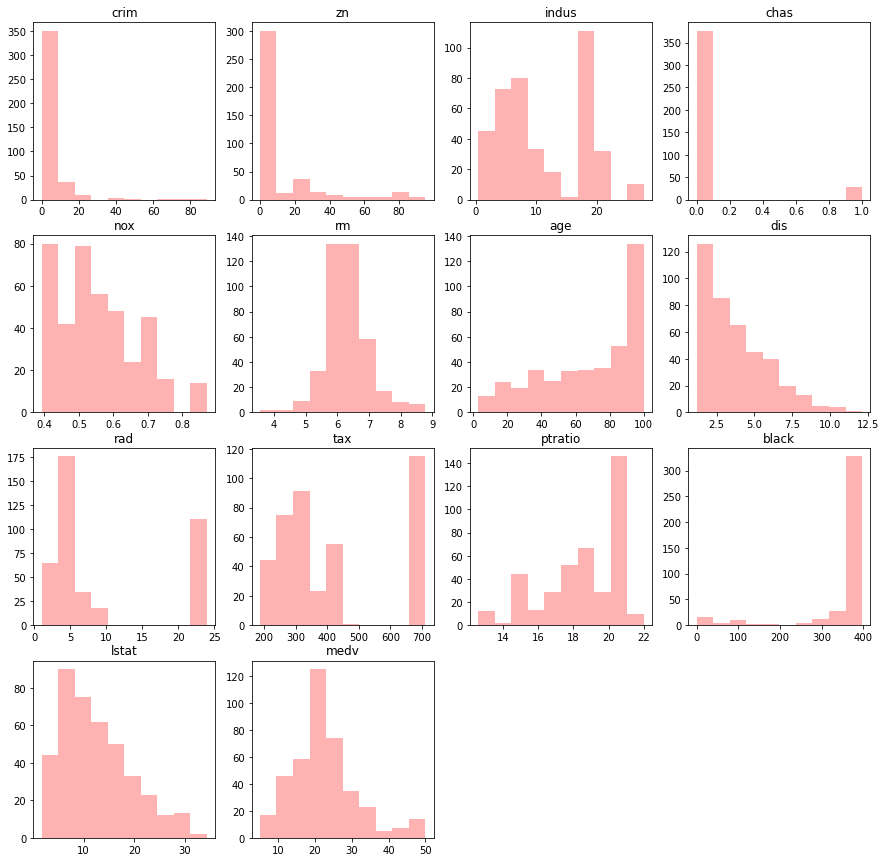

In [9]:
# 전체 칼럼 분포 확인
fig = plt.figure(figsize=[15,15])

for i,col in enumerate(data):
    ax_i = fig.add_subplot(4,4,i+1)
    plt.hist(data[col],color='r',alpha=0.3)
    ax_i.title.set_text(col)

히스토그램으로만 그리니 target 변수와의 관계를 파악하기 어려워, 산점도로 다시 전체 변수를 확인.
또한 임의로 변수들을 줄이거나 가공하기 어려움이 있을 것 같아, 변수들 간의 관계도 파악해보기로 결정.

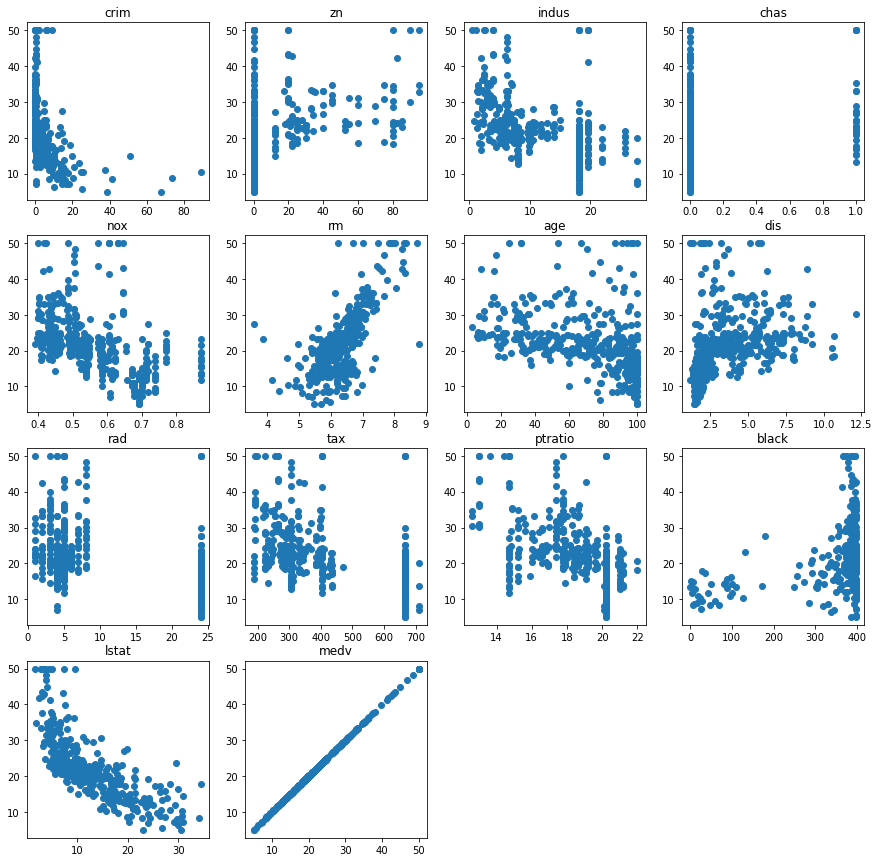

In [10]:
# target 변수와의 관계를 파악하기 위해 산점도로 다시 확인  
y = data['medv']
fig = plt.figure(figsize=[15,15])

for i,col in enumerate(data):
    ax_i = fig.add_subplot(4,4,i+1)
    plt.scatter(data[col],y)
    ax_i.title.set_text(col)

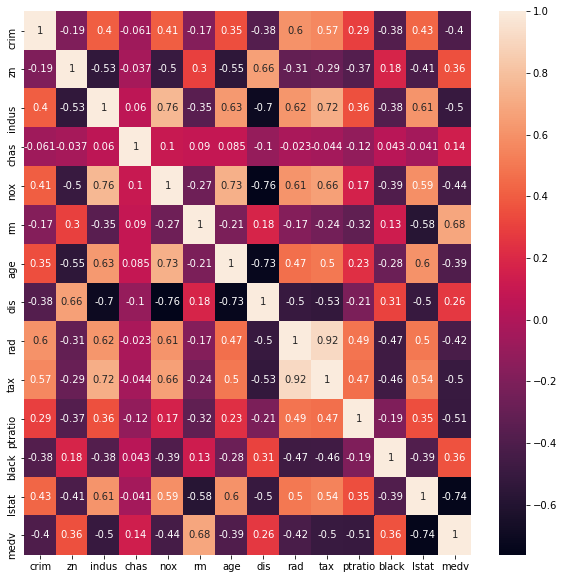

In [11]:
# 변수들의 상관관계 파악
import seaborn as sns

corr = data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

#plt.matshow(corr)
#plt.colorbar()
#plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
#plt.yticks(range(len(corr.columns)),corr.columns)
#plt.show()

In [12]:
# rad 와 tax가 가장 높은 상관관계를 보이며,
# 다른 변수들의 상관관계도 낮지 않은 편 

#### 3) 알고리즘 적용

In [13]:
# 특성 레이블과 타겟 레이블 분리
y_data = data['medv']
x_data = data.drop('medv',axis=1)

In [14]:
# 카테고리형 변수 chas 인코딩
x_data = pd.get_dummies(x_data,columns=['chas'])
x_data.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,chas_0.0,chas_1.0
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,1,0
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,1,0
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,1,0


In [15]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0)

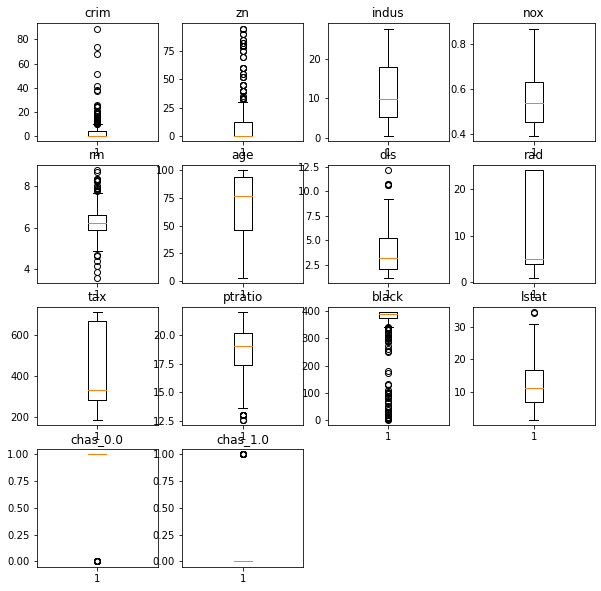

In [16]:
# 대부분의 변수들이 실수형이므로 정규화 진행 
# 정규화의 종류를 결정하기 위해 칼럼들의 outlier 확인
fig = plt.figure(figsize=[10,10])

for i,col in enumerate(x_data):
    ax_i = fig.add_subplot(4,4,i+1)
    plt.boxplot(x_data[col])
    ax_i.title.set_text(col)

In [17]:
# 이상치가 많이 존재하는 칼럼이 5개 존재
# 이상치의 영향을 가장 적게 받는 RobustScaler를 사용하여 스케일링
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [18]:
# Linear Regression 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scaled_x_train,y_train)
predict = model.predict(scaled_x_test)

In [19]:
print("학습세트:",model.score(scaled_x_train,y_train))
print("테스트세트:",model.score(scaled_x_test,y_test))

학습세트: 0.7278504803412009
테스트세트: 0.84947709376441


In [20]:
# 오차 지표 확인
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predict)

print('MSE : {0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 10.769,RMSE : 3.282
Variance score : 0.849


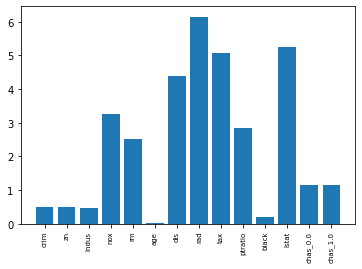

In [21]:
# 변수별 중요도 확인
feature_importance = np.abs(model.coef_)
label = [col for col in x_train.columns]
index = np.arange(len(label))
plt.bar([x for x in range(len(feature_importance))],feature_importance)
plt.xticks(index, label, fontsize=7,rotation=90)
plt.show()

In [22]:
# 앞서 높은 상관관계를 보인 칼럼 rad,tax 중 분산이 낮았던 rad 제거 후 다시 적용
drop_x_data = x_data.drop('rad',axis=1)
drop_x_train,drop_x_test,y_train,y_test = train_test_split(drop_x_data,y_data,test_size=0.2,random_state=0)

scaler = RobustScaler()
scaled_x_train=scaler.fit_transform(drop_x_train)
scaled_x_test = scaler.transform(drop_x_test)

model = LinearRegression()
model.fit(drop_x_train,y_train)
predict = model.predict(drop_x_test)

mse = mean_squared_error(y_test,predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predict)

print("학습세트:",model.score(drop_x_train,y_train))
print("테스트세트:",model.score(drop_x_test,y_test))
print('MSE : {0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2))

학습세트: 0.71680398263583
테스트세트: 0.8458407462275765
MSE : 11.029,RMSE : 3.321
Variance score : 0.846


In [23]:
# 비교적 변수들끼리 높은 상관관계를 보였고 특정 변수들이 큰 영향력을 미치므로 PCA 적용 후 regression 적용
# 스케일링 후 pca를 적용해야 하므로 스케일링 과정부터 다시
scaler = RobustScaler()
scaled_x = scaler.fit_transform(x_data)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit(scaled_x)
columns = pd.DataFrame(scaled_x).columns

Result = ['Variance','Variance%','Cum%']
result_pc = np.transpose(np.array(pca_result.components_).reshape(np.shape(pca_result.components_)))
result_var = np.array(np.transpose(pca_result.explained_variance_[:,np.newaxis]))
result_varp = np.array(np.transpose(pca_result.explained_variance_ratio_[:,np.newaxis]))
result_sum = np.cumsum(np.round(pca_result.explained_variance_ratio_,decimals=8)*100)
result_varc = np.array(np.transpose(result_sum[:,np.newaxis]))
result_df = pd.DataFrame(np.concatenate((result_pc,result_var,result_varp,result_varc),axis=0),
                         index=np.concatenate((np.array(columns),Result)),
                         columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
result_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.242782,0.758619,0.567823,0.107166,-0.117204,-0.122429,-0.001275,0.032747,-0.007002,-0.008060
1,-0.095679,-0.437901,0.766056,-0.279394,0.290163,0.161003,0.007458,0.103674,-0.093473,0.060735
2,0.052097,0.114054,-0.094313,-0.088348,0.268558,0.158784,0.252246,-0.143687,0.149771,0.232108
3,0.066854,0.134284,-0.106864,-0.033264,0.505699,0.067009,0.260800,-0.070410,0.016356,-0.347081
4,-0.035162,-0.127816,0.131550,0.831344,0.123861,0.352051,-0.292373,-0.130981,0.113761,0.069948
5,0.044293,0.127015,-0.114816,-0.000406,0.373634,0.091385,-0.356420,0.335778,-0.312190,-0.551188
6,-0.056488,-0.160687,0.159962,-0.099164,-0.390213,-0.048213,-0.135788,-0.299839,0.405734,-0.650809
7,0.052560,0.093882,0.008503,-0.031960,0.112215,0.286843,0.191695,-0.282600,0.203588,-0.104034
8,0.052012,0.090095,0.002732,-0.075333,0.167870,0.284332,0.231662,-0.308781,0.168108,-0.061116
9,0.041514,0.128330,-0.081004,-0.241182,-0.393030,0.793871,-0.062818,0.255349,-0.111853,0.023028


In [25]:
# 94% 설명력을 가진 PC4까지 선택
pca = PCA(n_components=4) 
pca_result = pca.fit_transform(scaled_x)
pca_x = pd.DataFrame(data=pca_result, columns = ['PC1','PC2','PC3','PC4'])
pca_x.head(3)

,PC1,PC2,PC3,PC4
0,-1.266223,-0.326391,-0.903565,-0.226957
1,-2.351537,-0.925301,0.662927,-0.886480
2,-1.989808,0.302695,-1.152236,-0.112160


In [26]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pca_x,y_data,test_size=0.2,random_state=0)

In [27]:
# Linear Regression 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [28]:
print("학습세트:",model.score(x_train,y_train))
print("테스트세트:",model.score(x_test,y_test))

학습세트: 0.6514582037980456
테스트세트: 0.8504286631194764


Linear Regression 말고 다른 알고리즘은 어느 상황에 어떤 것을 적용해야 효과적인지에 대한 이해가 부족.
이후에 다른 알고리즘도 적용해 볼 예정